# Classifying Hardware Images Using CNN's

There are hundreds of different types of hardware items, and many of them are not commonly known by most people.  In some cases, the task of locating a needed piece of hardware can require consulting with several individuals, multiple trips to stores, and a great deal of wasted time.

## Data
The data comes from processing 5,202 images of hardware items.  The images all fall into one of five categories, each with approximately 1,000 images.

Hardware Categories:
1. Cam Connectors
2. Anchor Screws
3. Eye Bolt
4. Extruded U-Bolt
5. Jack Nut

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras import backend as K
from sklearn.metrics import confusion_matrix

C:\Users\Public\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Grayscale Data from Processed Images

In [2]:
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_val = np.load('X-val.npy')
y_val = np.load('y-val.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

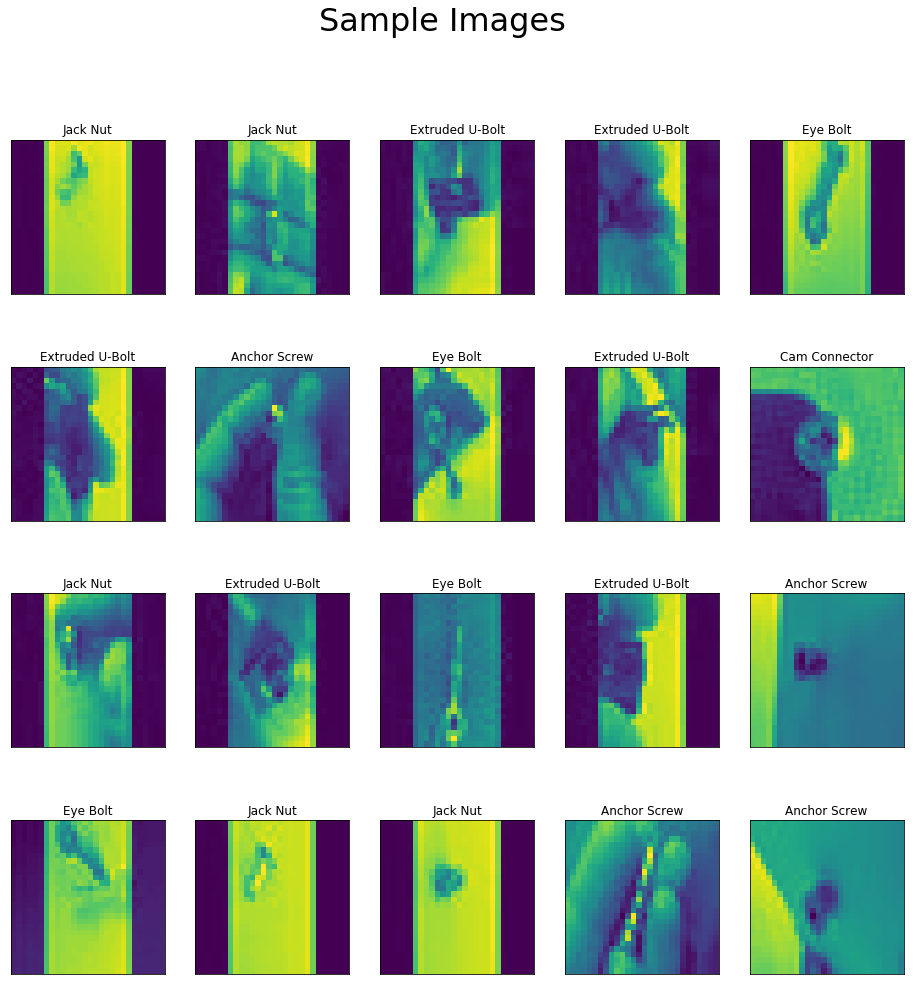

In [3]:
plt.figure(figsize=(16, 16))
for i in np.arange(20):
    plt.subplot(4, 5, i + 1)
    if y_train[i] == 0:
        plt.title('Cam Connector')
    if y_train[i] == 1:
        plt.title('Anchor Screw')
    if y_train[i] == 2:
        plt.title('Eye Bolt')
    if y_train[i] == 3:
        plt.title('Extruded U-Bolt')
    if y_train[i] == 4:
        plt.title('Jack Nut')
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Sample Images', fontsize=32)

plt.show()

# Multi-Layer Perceptron

In [4]:
X_train = X_train.reshape(3329, 784)
X_val = X_val.reshape(936, 784)
X_test = X_test.reshape(937, 784)
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)

In [5]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP

# Relu is the activation function used
model.add(Dense(64, activation='relu', input_shape=(784,)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(5, activation='softmax'))

model.summary()

# Compile the model to put it all together.
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 54,725
Trainable params: 54,725
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 0s 147us/step - loss: 1.4555 - acc: 0.4088 - val_loss: 1.6675 - val_acc: 0.2511
Epoch 2/50
3329/3329 [==============================] - 0s 52us/step - loss: 1.2855 - acc: 0.4623 - val_loss: 1.2444 - val_acc: 0.5032
Epoch 3/50
3329/3329 [==============================] - 0s 47us/step - loss: 1.1781 - acc: 0.5065 - val_loss: 1.3365 - val_acc: 0.4754
Epoch 4/50
3329/3329 [==============================] - 0s 43us/step - loss: 1.1249 - acc: 0.5260 - val_loss: 1.3501 - val_acc: 0.4872
Epoch 5/50
3329/3329 [==============================] - 0s 43us/step - loss: 1.0668 - acc: 0.5476 - val_loss: 1.3911 - val_acc: 0.3942
Epoch 6/50
3329/3329 [==============================] - 0s 44us/step - loss: 1.0555 - acc: 0.5509 - val_loss: 1.2503 - val_acc: 0.5085
Epoch 7/50
3329/3329 [==============================] - 0s 44us/step - loss: 1.0419 - acc: 0.5575 - val_loss: 1.2798 - val_acc: 0.5085
Epoch 8

In [7]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9401737443919879
Test accuracy: 0.5421558164672383


# CNN Using Grayscale Data

In [8]:
X_train = np.load('X-train.npy')
y_train = np.load('y-train.npy')
X_val = np.load('X-val.npy')
y_val = np.load('y-val.npy')
X_test = np.load('X-test.npy')
y_test = np.load('y-test.npy')

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_val /= 255
X_test /= 255

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 5)
y_val = keras.utils.to_categorical(y_val, 5)
y_test = keras.utils.to_categorical(y_test, 5)

In [9]:
# input image dimensions, from our data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 3329 samples, validate on 936 samples
Epoch 1/50
3329/3329 [==============================] - 16s 5ms/step - loss: 1.4946 - acc: 0.3644 - val_loss: 1.8450 - val_acc: 0.2756
Epoch 2/50
3329/3329 [==============================] - 15s 5ms/step - loss: 1.3092 - acc: 0.4674 - val_loss: 1.6105 - val_acc: 0.4530
Epoch 3/50
3329/3329 [==============================] - 15s 5ms/step - loss: 1.1899 - acc: 0.5122 - val_loss: 1.1833 - val_acc: 0.5502
Epoch 4/50
3329/3329 [==============================] - 15s 5ms/step - loss: 1.0481 - acc: 0.5752 - val_loss: 1.0902 - val_acc: 0.5491
Epoch 5/50
3329/3329 [==============================] - 15s 5ms/step - loss: 0.9717 - acc: 0.6095 - val_loss: 0.8501 - val_acc: 0.6720
Epoch 6/50
3329/3329 [==============================] - 15s 5ms/step - loss: 0.9251 - acc: 0.6236 - val_loss: 0.7939 - val_acc: 0.6624
Epoch 7/50
3329/3329 [==============================] - 15s 5ms/step - loss: 0.8409 - acc: 0.6702 - val_loss: 0.8821 - val_acc: 0.6485
Epoch 8/

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.528480884486863
Test accuracy: 0.8175026682804845


# RGB Data from Processed Images

In [11]:
X_train = np.load('X-train-rgb.npy')
y_train = np.load('y-train-rgb.npy')
X_val = np.load('X-val-rgb.npy')
y_val = np.load('y-val-rgb.npy')
X_test = np.load('X-test-rgb.npy')
y_test = np.load('y-test-rgb.npy')

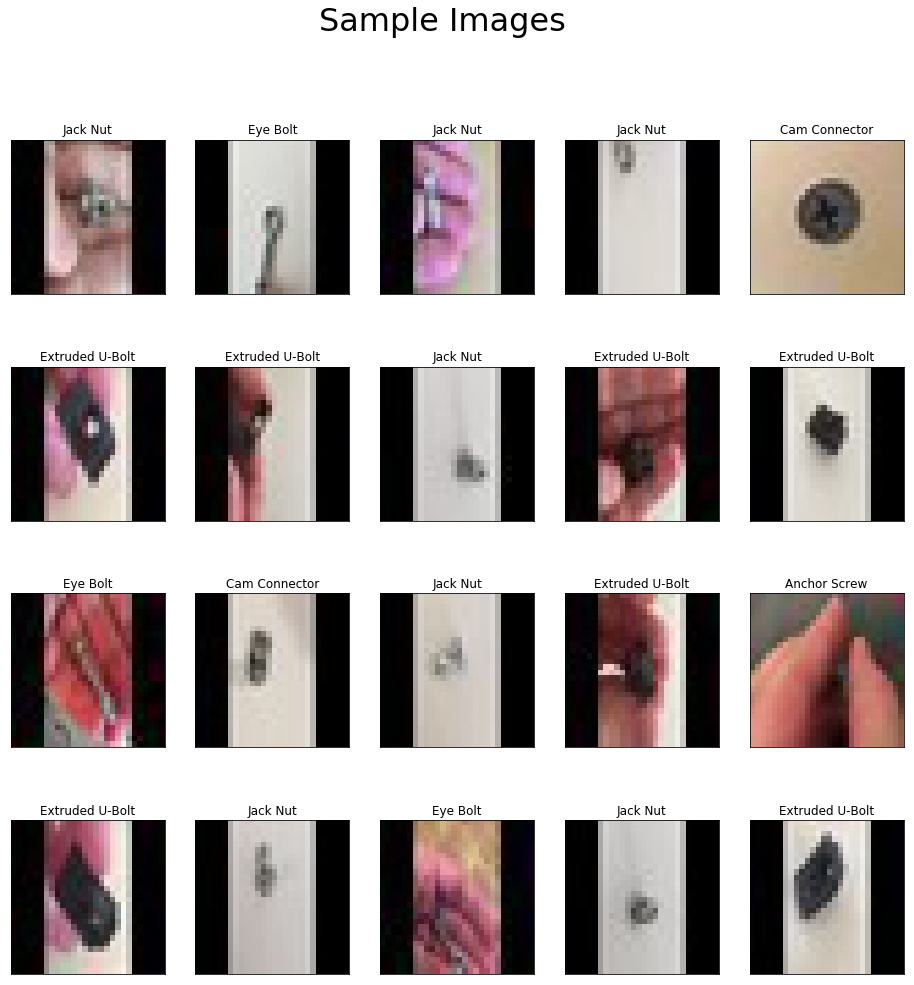

In [12]:
plt.figure(figsize=(16, 16))
for i in np.arange(20):
    plt.subplot(4, 5, i + 1)
    if y_train[i] == 0:
        plt.title('Cam Connector')
    if y_train[i] == 1:
        plt.title('Anchor Screw')
    if y_train[i] == 2:
        plt.title('Eye Bolt')
    if y_train[i] == 3:
        plt.title('Extruded U-Bolt')
    if y_train[i] == 4:
        plt.title('Jack Nut')
    plt.imshow(X_train[i])
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Sample Images', fontsize=32)

plt.show()

# Covolutional Neural Network with RGB Data

In [13]:
# input image dimensions, from the data
img_rows, img_cols = 28, 28
num_classes = 5


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_val = X_val.reshape(X_val.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                    activation='relu',
                    input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

cnn_hist = model.fit(X_train, y_train,
            batch_size=128,
            epochs=70,
            verbose=1,
            validation_data=(X_val, y_val))

X_train shape: (3329, 28, 28, 3)
3329 train samples
937 test samples
Train on 3329 samples, validate on 936 samples
Epoch 1/70
3329/3329 [==============================] - 17s 5ms/step - loss: 1.4956 - acc: 0.3701 - val_loss: 1.3647 - val_acc: 0.4583
Epoch 2/70
3329/3329 [==============================] - 16s 5ms/step - loss: 1.2294 - acc: 0.4836 - val_loss: 1.6579 - val_acc: 0.3098
Epoch 3/70
3329/3329 [==============================] - 16s 5ms/step - loss: 1.1287 - acc: 0.5347 - val_loss: 1.0607 - val_acc: 0.5321
Epoch 4/70
3329/3329 [==============================] - 17s 5ms/step - loss: 1.0068 - acc: 0.5906 - val_loss: 1.1938 - val_acc: 0.4786
Epoch 5/70
3329/3329 [==============================] - 19s 6ms/step - loss: 0.9210 - acc: 0.6425 - val_loss: 2.4232 - val_acc: 0.4199
Epoch 6/70
3329/3329 [==============================] - 17s 5ms/step - loss: 0.9089 - acc: 0.6654 - val_loss: 1.0300 - val_acc: 0.5556
Epoch 7/70
3329/3329 [==============================] - 17s 5ms/step - los

3329/3329 [==============================] - 16s 5ms/step - loss: 0.0491 - acc: 0.9853 - val_loss: 0.0814 - val_acc: 0.9744
Epoch 61/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0617 - acc: 0.9835 - val_loss: 0.1053 - val_acc: 0.9658
Epoch 62/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.1173 - acc: 0.9649 - val_loss: 0.0988 - val_acc: 0.9733
Epoch 63/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0483 - acc: 0.9862 - val_loss: 0.0774 - val_acc: 0.9776
Epoch 64/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0365 - acc: 0.9910 - val_loss: 0.1377 - val_acc: 0.9594
Epoch 65/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0498 - acc: 0.9844 - val_loss: 0.0804 - val_acc: 0.9744
Epoch 66/70
3329/3329 [==============================] - 16s 5ms/step - loss: 0.0534 - acc: 0.9817 - val_loss: 0.1160 - val_acc: 0.9626
Epoch 67/70
3329/3329 [==============================] - 16s

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09511776308190145
Test accuracy: 0.9701173959445037


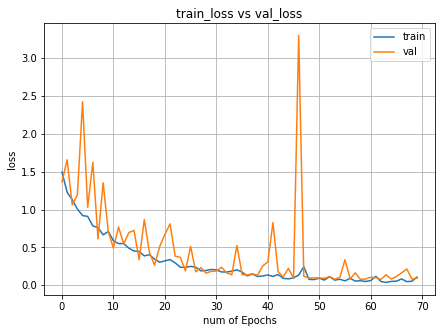

In [15]:
train_loss=cnn_hist.history['loss']
val_loss=cnn_hist.history['val_loss']
train_acc=cnn_hist.history['acc']
val_acc=cnn_hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

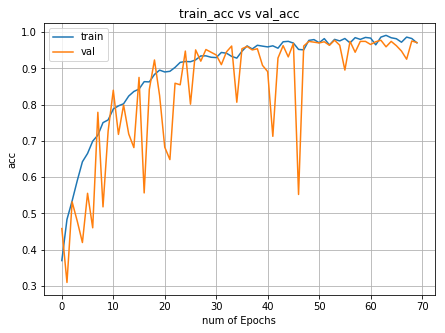

In [16]:
train_loss=cnn_hist.history['loss']
val_loss=cnn_hist.history['val_loss']
train_acc=cnn_hist.history['acc']
val_acc=cnn_hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('acc')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'])

In [20]:
y_train = np.load('y-train-rgb.npy')
y_pred = model.predict_classes(X_train)
confusion_matrix(y_train, y_pred)

array([[592,   0,   0,   0,   0],
       [  2, 670,   1,   0,   0],
       [  0,   0, 645,   0,   2],
       [  0,   0,   0, 684,   0],
       [  0,   0,   0,   0, 733]], dtype=int64)

In [24]:
y_pred = model.predict_classes(X_test)
y_test = np.load('y-test-rgb.npy')
confusion_matrix(y_test, y_pred)

array([[189,   0,   3,   0,   0],
       [ 12, 143,   3,   0,   2],
       [  1,   0, 179,   0,   6],
       [  1,   0,   0, 175,   0],
       [  0,   0,   0,   0, 223]], dtype=int64)

In [32]:
print(confusion_matrix(y_test, y_pred))

[[189   0   3   0   0]
 [ 12 143   3   0   2]
 [  1   0 179   0   6]
 [  1   0   0 175   0]
 [  0   0   0   0 223]]
